In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(29.745382715443682, 81.22351193901662),
 (-69.67158536528662, -66.03691098056517),
 (2.086331980883145, -45.357958376243545),
 (3.205492543186324, 40.68709963672049),
 (-8.566412287873263, 8.268062127110042),
 (65.54722003011074, -69.52065653786458),
 (-10.421220794319098, 62.65344047732643),
 (56.96712219658025, -13.293794888597503),
 (-81.32368410588728, -26.860138495207906),
 (-50.68788071507687, -31.05864631430105),
 (76.10112321884426, 64.23291843352251),
 (-11.89457211489956, 50.41460059438094),
 (64.40606573162046, -79.82490002052373),
 (75.72269952939754, -77.22414880529342),
 (-22.94899542736252, 67.68511374287067),
 (34.892400044647914, -21.250442132528576),
 (-26.606414092754427, -56.494789480775694),
 (33.60084852266269, -35.83214624808585),
 (3.3810479594402096, -25.666525808831977),
 (57.334348421611224, -1.8373226049854452),
 (-20.705134242672926, 69.40198450488151),
 (-32.17686036587307, -20.137423454138954),
 (84.40389435710813, 87.21875323260588),
 (46.1184210734437

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10fa2e1853d40913882deaf5c59e5cc


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10fa2e1853d40913882deaf5c59e5cc&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Get the text of the 'Get' request. 
city_weather.text

'{"cod":"404","message":"city not found"}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'cod': '404', 'message': 'city not found'}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 39.78,
  'feels_like': 33.82,
  'temp_min': 32.95,
  'temp_max': 43.36,
  'pressure': 1017,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 285, 'gust': 25.01},
 'clouds': {'all': 75},
 'dt': 1642013282,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641989515,
  'sunset': 1642023166},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1641989515,
 'sunset': 1642023166}

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 43.36 46 75 8.99


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 1, 12, 18, 48, 2)

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_wdescription = city_weather["weather"][0]["description"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Current Description": city_wdescription,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
                          
                            

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dharchula
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | salinopolis
Processing Record 4 of Set 1 | mandera
Processing Record 5 of Set 1 | soyo
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | ambilobe
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | yegros
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | cruden bay
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | cervo
Processing Record 22 of Set 1 | san vicente de 

Processing Record 39 of Set 4 | thaba-tseka
Processing Record 40 of Set 4 | kikwit
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | varnavino
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | una
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | luena
Processing Record 48 of Set 4 | quelimane
Processing Record 49 of Set 4 | polunochnoye
Processing Record 50 of Set 4 | jurado
Processing Record 1 of Set 5 | himora
City not found. Skipping...
Processing Record 2 of Set 5 | aksu
Processing Record 3 of Set 5 | ustka
Processing Record 4 of Set 5 | bomet
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 5 | marsh harbour
Processing Record 8 of Set 5 | alpena
Processing Record 9 of Set 5 | qaqortoq
Processing Record 10 of Set 5 | chuy
Processing Record 11 of Set 5 | sfantu gheorghe
Processing Record 12 of Set 5 | sao felix do xi

Processing Record 34 of Set 8 | tamandare
Processing Record 35 of Set 8 | sinjah
City not found. Skipping...
Processing Record 36 of Set 8 | bahar
Processing Record 37 of Set 8 | sakakah
Processing Record 38 of Set 8 | faya
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | malwan
City not found. Skipping...
Processing Record 41 of Set 8 | caceres
Processing Record 42 of Set 8 | araguaina
Processing Record 43 of Set 8 | los llanos de aridane
Processing Record 44 of Set 8 | bargal
City not found. Skipping...
Processing Record 45 of Set 8 | kubuta
Processing Record 46 of Set 8 | sao luiz gonzaga
Processing Record 47 of Set 8 | lobva
Processing Record 48 of Set 8 | ilesha
Processing Record 49 of Set 8 | andenes
Processing Record 50 of Set 8 | sawakin
Processing Record 1 of Set 9 | tiznit
Processing Record 2 of Set 9 | jumla
Processing Record 3 of Set 9 | porbandar
Processing Record 4 of Set 9 | atar
Processing Record 5 of Set 9 | emba
Processing Record 6 of Set 9

Processing Record 19 of Set 12 | chanderi
Processing Record 20 of Set 12 | chicama
Processing Record 21 of Set 12 | curillo
Processing Record 22 of Set 12 | haverfordwest
Processing Record 23 of Set 12 | toliary
City not found. Skipping...
Processing Record 24 of Set 12 | severodvinsk
Processing Record 25 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 26 of Set 12 | nortelandia
Processing Record 27 of Set 12 | malakal
Processing Record 28 of Set 12 | durusu
Processing Record 29 of Set 12 | bahir dar
Processing Record 30 of Set 12 | clarence town
Processing Record 31 of Set 12 | sebrovo
Processing Record 32 of Set 12 | rincon
Processing Record 33 of Set 12 | wolgast
Processing Record 34 of Set 12 | lexington-fayette
Processing Record 35 of Set 12 | jacqueville
Processing Record 36 of Set 12 | sandnessjoen
Processing Record 37 of Set 12 | bogandinskiy
Processing Record 38 of Set 12 | whitewater
Processing Record 39 of Set 12 | san cristobal
Processing Record 40 of S

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Current Description,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Dharchula,29.8500,80.5333,scattered clouds,42.08,51,42,7.92,IN
1,Ushuaia,-54.8000,-68.3000,scattered clouds,56.82,66,40,36.82,AR
2,Salinopolis,-0.6136,-47.3561,broken clouds,81.88,72,74,8.16,BR
3,Mandera,3.9366,41.8670,overcast clouds,85.48,27,100,10.54,KE
4,Soyo,-6.1349,12.3689,overcast clouds,80.65,82,100,6.87,AO
5,Iqaluit,63.7506,-68.5145,overcast clouds,-13.27,69,100,3.00,CA
6,Victoria,22.2855,114.1577,overcast clouds,62.33,82,100,5.01,HK
7,Westport,41.1415,-73.3579,broken clouds,42.75,56,59,1.01,US
8,Cidreira,-30.1811,-50.2056,clear sky,78.51,65,0,11.03,BR
9,Ambilobe,-13.2000,49.0500,overcast clouds,76.64,94,100,2.19,MG


In [35]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed", "Current Description"]
city_data_df = city_data_df[new_column_order]

In [36]:
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Dharchula,IN,29.8500,80.5333,42.08,51,42,7.92,scattered clouds
1,Ushuaia,AR,-54.8000,-68.3000,56.82,66,40,36.82,scattered clouds
2,Salinopolis,BR,-0.6136,-47.3561,81.88,72,74,8.16,broken clouds
3,Mandera,KE,3.9366,41.8670,85.48,27,100,10.54,overcast clouds
4,Soyo,AO,-6.1349,12.3689,80.65,82,100,6.87,overcast clouds
5,Iqaluit,CA,63.7506,-68.5145,-13.27,69,100,3.00,overcast clouds
6,Victoria,HK,22.2855,114.1577,62.33,82,100,5.01,overcast clouds
7,Westport,US,41.1415,-73.3579,42.75,56,59,1.01,broken clouds
8,Cidreira,BR,-30.1811,-50.2056,78.51,65,0,11.03,clear sky
9,Ambilobe,MG,-13.2000,49.0500,76.64,94,100,2.19,overcast clouds


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1642014905.8428822

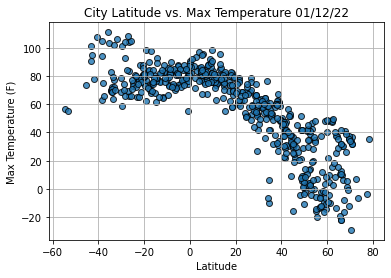

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
print (index13)


In [ ]:
city_data_df["Lat"] >= 0

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))